In [2]:
import pandas as pd

In [3]:
csv_file = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Projects\\FakeNews\\FakeNewsNet-master\\dataset\\gossipcop_fake.csv"
gossipcop_fake = pd.read_csv(csv_file)
csv_file = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Projects\\FakeNews\\FakeNewsNet-master\\dataset\\gossipcop_real.csv"
gossipcop_real = pd.read_csv(csv_file)
csv_file = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Projects\\FakeNews\\FakeNewsNet-master\\dataset\\politifact_real.csv"
politifact_real = pd.read_csv(csv_file)
csv_file = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Projects\\FakeNews\\FakeNewsNet-master\\dataset\\politifact_fake.csv"
politifact_fake = pd.read_csv(csv_file)

In [4]:
gossipcop_fake.head(4)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...


In [5]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

In [6]:
gossipcop_fake['title'].head(4)

0    Did Miley Cyrus and Liam Hemsworth secretly ge...
1    Paris Jackson & Cara Delevingne Enjoy Night Ou...
2    Celebrities Join Tax March in Protest of Donal...
3    Cindy Crawford's daughter Kaia Gerber wears a ...
Name: title, dtype: object

In [7]:
def series_to_tokens(series):
    np_array = np.array([])
    for title in series:
        np_array = np.append(np_array, word_tokenize(title))
    return np_array

In [8]:
gossipcop_fake['title'].iloc[0]

'Did Miley Cyrus and Liam Hemsworth secretly get married?'

In [9]:
%timeit
#thing = gossipcop_fake['title'].apply(series_to_tokens)
fake_title_words = series_to_tokens(gossipcop_fake['title'].values)

In [10]:
import collections

In [11]:
fake_title_counter = dict(collections.Counter(fake_title_words))

In [12]:
print(len(fake_title_counter))

def dict_filter(my_dict, low_val=10, high_val=None):
    filtered_dict = dict()
    for (key, value) in my_dict.items():
        if high_val is None:
            if value > low_val:
                filtered_dict[key] = value
        else:
            if value > low_val and value < high_val:
                filtered_dict[key] = value
    return filtered_dict

9466


In [13]:
fake_title_words_2 = series_to_tokens(politifact_fake['title'].values)
true_title_words = series_to_tokens(politifact_real['title'].values)
fake_title_words = np.append(fake_title_words, fake_title_words_2)

In [14]:
len(fake_title_words)

73408

In [15]:
fake_title_counter = dict(collections.Counter(fake_title_words))
a300_fake_title_counter = dict_filter(fake_title_counter, 300)
print((a300_fake_title_counter))

{'and': 1017, '?': 722, '&': 490, ':': 1115, '‘': 747, '’': 1692, 'in': 356, 'of': 478, "'s": 757, 'a': 402, 'Jenner': 382, 'With': 478, 'To': 569, 's': 747, 'The': 470, ',': 1047, 'Is': 557, 'Justin': 350, "'": 690, 'Jennifer': 478, 'Brad': 412, 'Pitt': 380, '!': 409, 'to': 752, 'on': 348, 'the': 522, 'Her': 324, 'Kardashian': 466}


In [17]:
true_title_words_2 = series_to_tokens(gossipcop_real['title'].values)

In [18]:
true_title_counter = dict(collections.Counter(true_title_words))

In [19]:
print(len(fake_title_words))
print(len(true_title_words))
true_title_counter

73408
5596


{'National': 9,
 'Federation': 1,
 'of': 122,
 'Independent': 1,
 'Business': 4,
 'comments': 3,
 'in': 68,
 'Fayetteville': 1,
 'NC': 1,
 'Romney': 9,
 'makes': 1,
 'pitch': 1,
 ',': 192,
 'hoping': 1,
 'to': 74,
 'close': 1,
 'deal': 3,
 ':': 141,
 'Elections': 2,
 'The': 42,
 'Rocky': 1,
 'Mountain': 1,
 'News': 30,
 'Democratic': 15,
 'Leaders': 1,
 'Say': 2,
 'House': 15,
 'Democrats': 5,
 'Are': 2,
 'United': 13,
 'Against': 4,
 'GOP': 9,
 'Default': 1,
 'Act': 17,
 'Budget': 8,
 'the': 128,
 'States': 13,
 'Government': 6,
 'FY': 2,
 '2008': 8,
 'Donald': 7,
 'Trump': 22,
 'exaggerates': 1,
 'when': 1,
 'he': 3,
 'says': 21,
 'China': 3,
 'has': 3,
 "'total": 1,
 'control': 1,
 "'": 40,
 'over': 3,
 'North': 1,
 'Korea': 1,
 '25th': 2,
 'Amendment': 3,
 '子供たちのコト。私のコト。': 1,
 'Briefing': 4,
 'by': 38,
 'White': 6,
 'Press': 9,
 'Secretary': 3,
 'Robert': 2,
 'Gibbs': 2,
 '9/10/09': 1,
 'A': 18,
 'Solar': 2,
 'Grand': 1,
 'Plan': 5,
 'Scientific': 1,
 'American': 7,
 'Covering': 1,

In [20]:
len(true_title_words_2)

215757

In [21]:
true_title_words = np.append(true_title_words, true_title_words_2)

In [22]:
true_title_counter = dict(collections.Counter(true_title_words))

In [23]:
print(len(true_title_words))

221353


In [24]:
true_title_counter

{'National': 46,
 'Federation': 1,
 'of': 2311,
 'Independent': 8,
 'Business': 17,
 'comments': 15,
 'in': 2097,
 'Fayetteville': 1,
 'NC': 1,
 'Romney': 9,
 'makes': 46,
 'pitch': 2,
 ',': 3011,
 'hoping': 2,
 'to': 3018,
 'close': 10,
 'deal': 12,
 ':': 3656,
 'Elections': 4,
 'The': 1821,
 'Rocky': 8,
 'Mountain': 2,
 'News': 168,
 'Democratic': 16,
 'Leaders': 4,
 'Say': 41,
 'House': 100,
 'Democrats': 5,
 'Are': 387,
 'United': 22,
 'Against': 42,
 'GOP': 9,
 'Default': 2,
 'Act': 31,
 'Budget': 11,
 'the': 3199,
 'States': 17,
 'Government': 8,
 'FY': 2,
 '2008': 11,
 'Donald': 52,
 'Trump': 176,
 'exaggerates': 1,
 'when': 37,
 'he': 115,
 'says': 163,
 'China': 7,
 'has': 88,
 "'total": 2,
 'control': 6,
 "'": 3601,
 'over': 89,
 'North': 40,
 'Korea': 1,
 '25th': 8,
 'Amendment': 4,
 '子供たちのコト。私のコト。': 1,
 'Briefing': 4,
 'by': 288,
 'White': 61,
 'Press': 17,
 'Secretary': 6,
 'Robert': 66,
 'Gibbs': 2,
 '9/10/09': 1,
 'A': 506,
 'Solar': 5,
 'Grand': 6,
 'Plan': 27,
 'Scient

In [25]:
import operator
sorted_true = np.array(sorted(true_title_counter.items(), reverse=True, key=operator.itemgetter(1)))

In [26]:
sorted_true

array([[':', '3656'],
       ["'", '3601'],
       ['and', '3471'],
       ...,
       ['BIGGEST', '1'],
       ['HXG', '1'],
       ['butterflies', '1']], dtype='<U119')

In [27]:
sorted_false = np.array(sorted(fake_title_counter.items(), reverse=True, key=operator.itemgetter(1)))

In [28]:
sorted_false

array([['’', '1692'],
       [':', '1115'],
       [',', '1047'],
       ...,
       ['VOTING', '1'],
       ['Boycott', '1'],
       ['Mall', '1']], dtype='<U55')

In [29]:
print(sorted_true[:20])
print('\n', sorted_false[:20])

[[':' '3656']
 ["'" '3601']
 ['and' '3471']
 ["'s" '3364']
 ['’' '3265']
 ['the' '3199']
 ['to' '3018']
 [',' '3011']
 ['of' '2311']
 ['in' '2097']
 ['on' '1823']
 ['The' '1821']
 ['a' '1786']
 ['for' '1465']
 ['s' '1431']
 ['‘' '1396']
 ['Her' '1361']
 ['Is' '1211']
 ['at' '1167']
 ['!' '977']]

 [['’' '1692']
 [':' '1115']
 [',' '1047']
 ['and' '1017']
 ["'s" '757']
 ['to' '752']
 ['‘' '747']
 ['s' '747']
 ['?' '722']
 ["'" '690']
 ['To' '569']
 ['Is' '557']
 ['the' '522']
 ['&' '490']
 ['of' '478']
 ['With' '478']
 ['Jennifer' '478']
 ['The' '470']
 ['Kardashian' '466']
 ['Brad' '412']]


In [30]:
fake_articles_amnt = len(gossipcop_fake['title']) + len(politifact_fake['title'])
true_articles_amnt = len(gossipcop_real['title']) + len(politifact_real['title'])

In [31]:
print(fake_articles_amnt)
print(true_articles_amnt)

5755
17441


In [32]:
true_percent = sorted_true[:, 1].astype(int) / true_articles_amnt
fake_percent = sorted_false[:, 1].astype(int) / fake_articles_amnt

In [33]:
print(true_percent[:20])
print('\n', fake_percent[:20])

[0.20962101 0.20646752 0.19901382 0.19287885 0.18720257 0.18341838
 0.17304054 0.17263918 0.13250387 0.12023393 0.10452382 0.10440915
 0.10240239 0.08399748 0.08204805 0.08004128 0.07803452 0.06943409
 0.0669113  0.05601743]

 [0.29400521 0.19374457 0.18192876 0.1767159  0.13153779 0.13066898
 0.12980017 0.12980017 0.12545613 0.11989574 0.09887055 0.0967854
 0.09070374 0.08514335 0.08305821 0.08305821 0.08305821 0.08166811
 0.08097307 0.07158992]


In [34]:
print("amount of ?'s in real article titles", true_title_counter["?"])
print("amount of ?'s in fake article titles", fake_title_counter["?"])

amount of ?'s in real article titles 705
amount of ?'s in fake article titles 722


In [35]:
print("amount of ?'s in real article titles", true_title_counter["?"])
print("amount of ?'s in fake article titles", fake_title_counter["?"])
print(true_title_counter["?"] / true_articles_amnt)
print(fake_title_counter["?"] / fake_articles_amnt)

amount of ?'s in real article titles 705
amount of ?'s in fake article titles 722
0.040421994151711486
0.1254561251086012


In [36]:
print("amount of !'s in real article titles", true_title_counter["!"])
print("amount of !'s in fake article titles", fake_title_counter["!"])
print(true_title_counter["!"] / true_articles_amnt)
print(fake_title_counter["!"] / fake_articles_amnt)

amount of !'s in real article titles 977
amount of !'s in fake article titles 409
0.05601743019322287
0.07106863596872284


In [37]:
#print(sorted_true[:20])
#print('\n', sorted_false[:20])
for i in range(40):
    print(sorted_true[i], true_percent[i], '\t', sorted_false[i], fake_percent[i])

[':' '3656'] 0.20962100796972652 	 ['’' '1692'] 0.294005212858384
["'" '3601'] 0.20646751906427382 	 [':' '1115'] 0.19374456993918332
['and' '3471'] 0.19901381801502208 	 [',' '1047'] 0.18192875760208516
["'s" '3364'] 0.1928788486898687 	 ['and' '1017'] 0.17671589921807124
['’' '3265'] 0.1872025686600539 	 ["'s" '757'] 0.1315377932232841
['the' '3199'] 0.18341838197351068 	 ['to' '752'] 0.1306689834926151
['to' '3018'] 0.17304053666647554 	 ['‘' '747'] 0.12980017376194614
[',' '3011'] 0.1726391835330543 	 ['s' '747'] 0.12980017376194614
['of' '2311'] 0.1325038701909294 	 ['?' '722'] 0.1254561251086012
['in' '2097'] 0.12023393154062267 	 ["'" '690'] 0.11989574283231973
['on' '1823'] 0.10452382317527664 	 ['To' '569'] 0.09887054735013032
['The' '1821'] 0.104409150851442 	 ['Is' '557'] 0.09678540399652476
['a' '1786'] 0.10240238518433577 	 ['the' '522'] 0.09070373588184187
['for' '1465'] 0.08399747720887564 	 ['&' '490'] 0.08514335360556038
['s' '1431'] 0.08204804770368672 	 ['of' '478'] 

In [38]:
print("amount of !'s in real article titles", true_title_counter["To"])
print("amount of !'s in fake article titles", fake_title_counter["To"])
print(true_title_counter["To"] / true_articles_amnt)
print(fake_title_counter["To"] / fake_articles_amnt)

amount of !'s in real article titles 389
amount of !'s in fake article titles 569
0.02230376698583797
0.09887054735013032


In [51]:
true_percent = true_percent * 100
fake_percent = fake_percent * 100

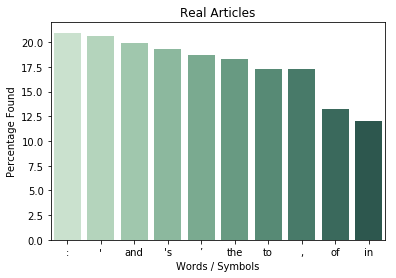

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sorted_true[:10,0], y=true_percent[:10], palette=("ch:2.5,-.2,dark=.3"))
plt.xlabel("Words / Symbols")
plt.ylabel("Percentage Found")
plt.title("Real Articles")
plt.show()

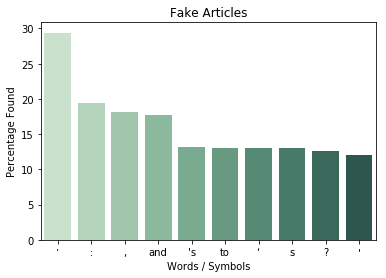

In [61]:
sns.barplot(x=sorted_false[:10,0], y=fake_percent[:10], palette=("ch:2.5,-.2,dark=.3"))
plt.xlabel("Words / Symbols")
plt.ylabel("Percentage Found")
plt.title("Fake Articles")
plt.show()

In [68]:
print(round(true_title_counter["To"] / true_articles_amnt * 100, 2), round(fake_title_counter["To"] / fake_articles_amnt * 100, 2))

2.23 9.89


In [72]:
real_To = round(2.23/(9.89+2.23), 2)
fake_To = round(9.89/(9.89+2.23), 2)

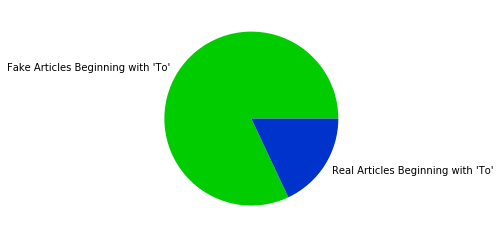

In [93]:
labels = ["Fake Articles Beginning with 'To'", "Real Articles Beginning with 'To'"]
sizes = [fake_To, real_To]
colors = ["#00cc00", "#0033cc"]
plt.pie(sizes, labels=labels, colors=colors)
plt.show()